In [11]:
# Import necessary libraries
import pandas as pd

import holidays
import statsmodels.api as sm
import warnings
import itertools
from sklearn.model_selection import train_test_split

from Data.load_data import get_energy_data
from helper_functions import create_error_metrics

In [2]:
df = get_energy_data()

In [3]:
X = df.loc[:, (df.columns != 'Temperature') & (df.columns != 'Load')]
y = df['Load']

# # Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [29]:
mod = sm.tsa.statespace.SARIMAX(
    y_train,order=(1, 0, 1))
# order=(1,0,1), seasonal_order=(0, 0, 0, 24))
res = mod.fit()
print(res.summary())

C:\Users\kai_p\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   Load   No. Observations:                21024
Model:               SARIMAX(1, 0, 1)   Log Likelihood             -215924.767
Date:                Mon, 29 Jan 2024   AIC                         431855.535
Time:                        18:57:40   BIC                         431879.395
Sample:                    12-31-2016   HQIC                        431863.322
                         - 05-26-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9983      0.000   2118.518      0.000       0.997       0.999
ma.L1          0.7820      0.005    147.282      0.000       0.772       0.792
sigma2      5.883e+07   6.62e-12   8.89e+18      0.0

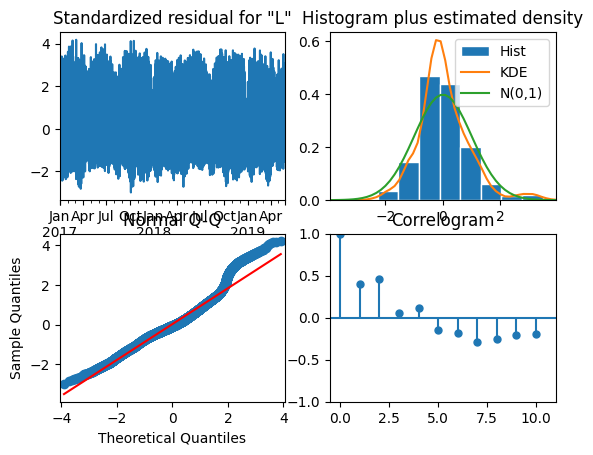

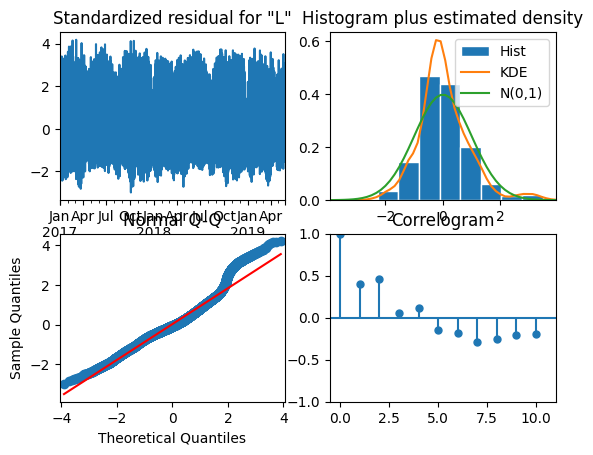

In [30]:
res.plot_diagnostics()

In [31]:
df_result = res.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1)

<Axes: xlabel='Date (UTC)'>

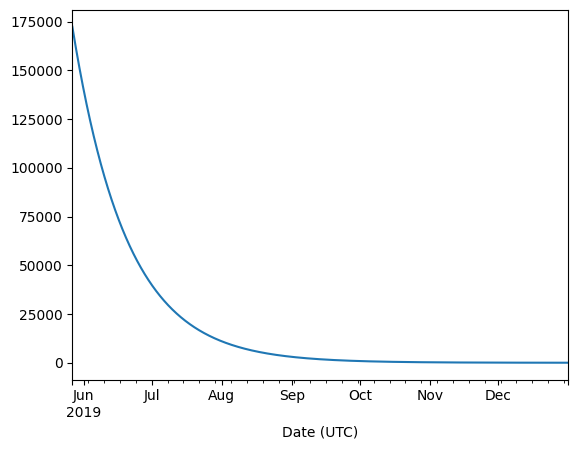

In [32]:
df_result.index = X_test.index
df_result.plot()

<Axes: xlabel='Date (UTC)'>

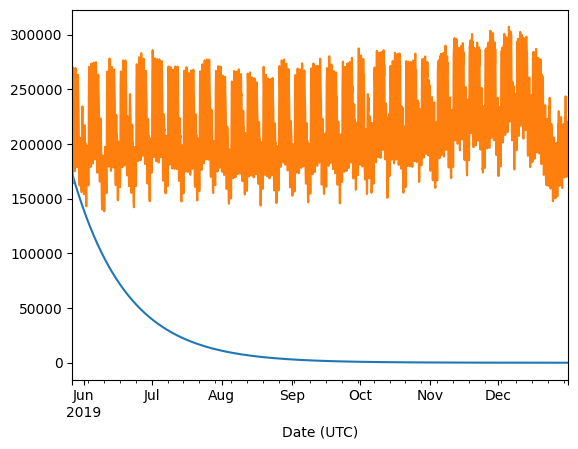

In [33]:
df_result.plot()
y_test.plot()

<Axes: xlabel='Date (UTC)'>

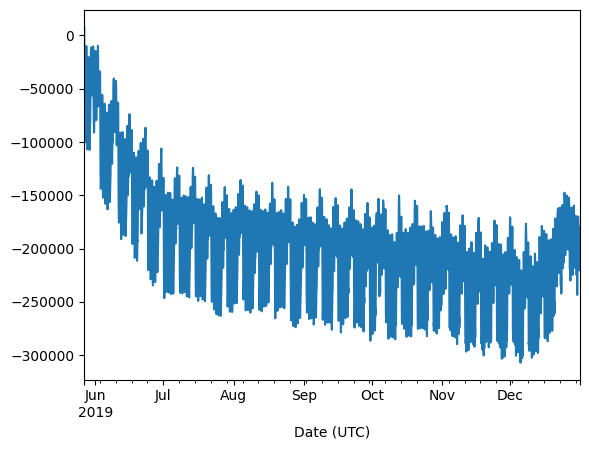

In [34]:
df_residuals = df_result - y_test
df_residuals.plot()

In [35]:
create_error_metrics(y_test, df_result)

,MAE,MSE,RMSE,MAPE %,R2 %
0,203475.88,4.451551e+10,210986.98,90.88,-2840.13
